In [10]:
#General Jupyter Configuration
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Pandas for data
import pandas

#Let's load our Army Corps data into Pandas, and take a quick look at it:
usace_data = pandas.read_csv("./Flood_Protection_BL3.csv")
#Show all the column names
print(list(usace_data))

#Print the full dataset
usace_data

['DID', 'HIST_YEAR BUILT', 'HIST_PAST_FAIL_OCCURENCE', 'POLICY_8_AT_RISK_FRESHWATER_PLANT', '8_ERROR_BND', 'HIST_568_FLOOD_MAGNIFICATION', 'HIST_568_ERROR_BND', 'FUTURE_568_FLOOD_MAGNIFICATION', 'FUTURE_568_ERROR_BND', 'HIST_566_FLOOD_FREQUENCY', 'HIST_566_ERROR_BND', 'FUTURE_566_FLOOD_FREQUENCY', 'FUTURE_566_ERROR_BND', 'HIST_244_BASE_FLOW', 'HIST_244_ERROR_BND', 'FUTURE_244_BASE_FLOW', 'FUTURE_244_ERROR_BND', 'HIST_221_MONTHLY_COV', 'HIST_221_ERROR_BND', 'FUTURE_221_MONTHLY_COV', 'FUTURE_221_ERROR_BND', 'HIST_570_90PERC_EXCEEDANCE', 'HIST_570_ERROR_BND', 'FUTURE_570_90PERC_EXCEEDANCE', 'FUTURE_570_ERROR_BND', 'HIST_65_MEAN_ANNUAL_RUNOFF', 'HIST_65_ERROR_BND', 'FUTURE_65_MEAN_ANNUAL_RUNOFF', 'FUTURE_65_ERROR_BND', 'POLICY_130_FLOODPLAIN_POPULATION', 'POLICY_130_ERROR_BND', 'POLICY_441_INUNDATION_AREA', 'POLICY_441_ERROR_BND', 'POLICY_443_POVERTY_POPULATION', 'POLICY_443_ERROR_BND', 'POLICY_450_NFIP_COMMUNITIES', 'POLICY_450_ERROR_BND', 'POLICY_590_URBAN_AREA', 'POLICY_590_ERROR_BND', 

DID  HIST_YEAR BUILT  HIST_PAST_FAIL_OCCURENCE  \
0     101             1973                         1   
1     102             1986                         1   
2     103             1983                         1   
3     104             1987                         0   
4     105             1992                         1   
5     106             1992                         1   
6     107             1993                         1   
7     108             1979                         1   
8     109             1997                         0   
9     110             1984                         0   
10    111             1982                         1   
11    201             1990                         1   
12    202             1987                         0   
13    203             1980                         1   
14    204             1988                         1   
15    205             1988                         1   
16    206             1974                         0   
17    207             1991                         0   
18    208             1994                         0   
19    301             1965                         1   
20    302             1945                         0   
21    303             1994                         1   
22    304             1966                         1   
23    305             1944                         0   
24    306             1948                         1   
25    307             1972                         0   
26    308             1932                         1   
27    309             1933                         0   
28    310             1980                         0   
29    311             1959                         0   
..    ...              ...                       ...   
174  1507             1945                         1   
175  1508             1914                         1   
176  1601             1969                         1   
177  1602             1997                         0   
178  1603             1981                         0   
179  1604             1951                         0   
180  1605             1970                         1   
181  1606             1945                         1   
182  1701             1944                         0   
183  1702             1982                         0   
184  1703             1989                         0   
185  1704             1943                         0   
186  1705             1984                         1   
187  1706             1971                         1   
188  1707             1939                         0   
189  1708             1993                         1   
190  1709             1988                         0   
191  1710             1961                         0   
192  1711             1973                         0   
193  1712             1975                         1   
194  1801             1957                         0   
195  1802             1967                         0   
196  1803             1992                         0   
197  1804             1987                         0   
198  1805             1990                         0   
199  1806             1969                         1   
200  1807             1941                         1   
201  1808             1973                         1   
202  1809             1962                         0   
203  1810             1957                         1   

     POLICY_8_AT_RISK_FRESHWATER_PLANT  8_ERROR_BND  \
0                            11.801462     3.968350   
1                            11.864575     4.618573   
2                            11.860671     4.001659   
3                            12.699056     1.612443   
4                             8.707630     5.790788   
5                            12.822215     2.238363   
6                            17.805427     2.196190   
7                            19.908813     1.924551   
8                            17.477238

In [11]:
import pandas
#Statsmodels to add the modeling
import statsmodels.formula.api

usace_data = pandas.read_csv("./Flood_Protection_BL3.csv")

#I want to compare two different approaches to predicting historic dam failure.
#First, I'm going to use an "out of the box" linear regression.
#This model predicts the past fail occurence (HIST_PAST_FAIL) based on
#all of the historic data we have.  Metadata on how to interpret these variables
#is available in the midterm assignment PDF.
model = statsmodels.formula.api.ols(formula="HIST_PAST_FAIL_OCCURENCE ~ HIST_568_FLOOD_MAGNIFICATION + \
                                    HIST_566_FLOOD_FREQUENCY + HIST_244_BASE_FLOW + \
                                    HIST_221_MONTHLY_COV + HIST_570_90PERC_EXCEEDANCE + \
                                    HIST_65_MEAN_ANNUAL_RUNOFF -1", 
                                    data=usace_data).fit()

print(model.summary())

#R-SQUARED IS AN IMPORTANT ONE!!!!!

                               OLS Regression Results                               
Dep. Variable:     HIST_PAST_FAIL_OCCURENCE   R-squared:                       0.565
Model:                                  OLS   Adj. R-squared:                  0.552
Method:                       Least Squares   F-statistic:                     42.94
Date:                      Thu, 01 Mar 2018   Prob (F-statistic):           2.40e-33
Time:                              17:38:39   Log-Likelihood:                -107.69
No. Observations:                       204   AIC:                             227.4
Df Residuals:                           198   BIC:                             247.3
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

===ITERATION BEGINNING!===
0
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Optimization terminated successfully.
         Current function value: 0.392447
         Iterations: 53
         Function evaluations: 93
Fitting Future
===ITERATION BEGINNING!===
1
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Optimization terminated successfully.
         Current function value: 0.392447
         Iterations: 53
         Function evaluations: 93
Fitting Future
===ITERATION BEGINNING!===
2
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Optimization terminated successfully.
         Current function value: 0.392447
         Iterations: 53
         Function evaluations: 93
Fitting Future
===ITERATION BEGINNING!===
3
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Optimization terminated successfully.
         Current function value: 0.392447
         Iterations: 53
         Function evaluations: 93
Fitting Future
===ITERATION BEGINNING!===
4
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Optimiza

===ITERATION BEGINNING!===
36
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Optimization terminated successfully.
         Current function value: 0.392447
         Iterations: 53
         Function evaluations: 93
Fitting Future
===ITERATION BEGINNING!===
37
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Optimization terminated successfully.
         Current function value: 0.392447
         Iterations: 53
         Function evaluations: 93
Fitting Future
===ITERATION BEGINNING!===
38
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Optimization terminated successfully.
         Current function value: 0.392447
         Iterations: 53
         Function evaluations: 93
Fitting Future
===ITERATION BEGINNING!===
39
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Optimization terminated successfully.
         Current function value: 0.392447
         Iterations: 53
         Function evaluations: 93
Fitting Future
===ITERATION BEGINNING!===
40
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Opt

===ITERATION BEGINNING!===
72
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Optimization terminated successfully.
         Current function value: 0.392447
         Iterations: 53
         Function evaluations: 93
Fitting Future
===ITERATION BEGINNING!===
73
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Optimization terminated successfully.
         Current function value: 0.392447
         Iterations: 53
         Function evaluations: 93
Fitting Future
===ITERATION BEGINNING!===
74
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Optimization terminated successfully.
         Current function value: 0.392447
         Iterations: 53
         Function evaluations: 93
Fitting Future
===ITERATION BEGINNING!===
75
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Optimization terminated successfully.
         Current function value: 0.392447
         Iterations: 53
         Function evaluations: 93
Fitting Future
===ITERATION BEGINNING!===
76
ADDING HISTORICAL UNCERTAINTY
I AM NOW FITTING
Opt

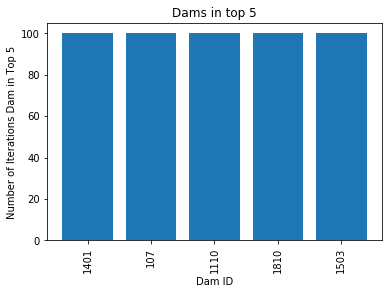

In [17]:
#I want to compare the model I fit above to a model I build myself.
#I'm going to use my own custom random variables model to see if I can beat the OLS.
#I'll compare my model to the OLS using R2.
#Make sure in your own midterm you make a good case for the 
#method you use for comparison!
import matplotlib.pyplot as plt
import collections
import pandas
import statsmodels.formula.api
#I'm going to be using a number of random
#distributions, so need the random package.
import random

#Instead of doing a brute force optimization like lab 2,
#this time I'm going to optimize using a specialized
#algorithm.  It's easier to code and much faster.
import scipy.optimize


#I'm going to use numpy and math to calculate
#my errors
import numpy
import math

#I'm going to use this to visualize how well my optimization works.
import pylab

#First, I want to define a silly algorithm to illustrate
#how this will work, and use as a point of comparison.
#One of your jobs in the midterm will be to produce a better
#algorithm.

record_outcomes = list()
global data_in
data_in = pandas.read_csv("./Flood_Protection_BL3.csv")
def noahs_algorithm(parameters_in):
#EVERYTHING BELOW WONT RUN UNTIL DANS_ALGORITHM IS CALLED    

    #I want to load my data locally inside this function:
    data_in = pandas.read_csv("./Flood_Protection_BL3.csv")
    
    #The goal of this algorithm is to predict
    #if a given dam failed (a binary 1) in the past.
    prediction_target = data_in['HIST_PAST_FAIL_OCCURENCE']
    
    #I am going to predict this based on 6 variables from the data - 
    #all of my historic data.Note the below is VERY sloppy code, and has many redundancies and unnecessary
    #copies, but is intentionally written in long form for ease of understanding.
    #The .values at the end is required by python to convert from pandas 
    #to lists (which we'll need later)
    prediction_var_1 = data_in['HIST_568_FLOOD_MAGNIFICATION'].values
    prediction_var_2 = data_in['HIST_566_FLOOD_FREQUENCY'].values
    prediction_var_3 = data_in['HIST_244_BASE_FLOW'].values
    prediction_var_4 = data_in['HIST_221_MONTHLY_COV'].values
    prediction_var_5 = data_in['HIST_570_90PERC_EXCEEDANCE'].values
    prediction_var_6 = data_in['HIST_65_MEAN_ANNUAL_RUNOFF'].values

    
    #Now, I'm going to write my algorithm.
    #This is a arbitrary example, you'll need to write your own!
    #The goal of this algorithm is to predict a probability of dam failure (between 0 and 1)
    #based on the input data and
    #parameters.  The optimization will solve for the best
    #parameters.
    
    #Note this code is very redundant, but being used to
    #hopefully explain in more detail what is happening.
    
    #As an example, here we're assigning a new variable (params_var_1)
    #to be a list of one elements - the first parameter
    #we pass to the function below.  
    #The first time this is called, parameters_in[0] would be equal to 0.01,
    #and represents the initial parameter guesses we assign to
    #HIST_568_FLOOD_MAGNIFICATION below.
    params_var_1 = parameters_in[0]
    params_var_2 = parameters_in[1]
    params_var_3 = parameters_in[2]
    params_var_4 = parameters_in[3]
    params_var_5 = parameters_in[4]
    params_var_6 = parameters_in[5]

    #Now I'm going to write my very simple algorithm.
    #I'm going to multiply the first parameter by it's variable,
    #then add it to the second parameter squared
    dam_failure_prediction = (prediction_var_1 * params_var_1) + \
                             (prediction_var_2 * params_var_2) + \
                             (prediction_var_3 * params_var_3) + \
                             (prediction_var_4 * params_var_4) + \
                             (prediction_var_5 * params_var_5) + \
                             (prediction_var_6 * params_var_6) #+1???????????????????????????????




    #I now have a list of my predictions, dam_failure_predictions,
    #which is all 0s and 1s. 
    #I want to compare that to the real dam failures to see how well
    #I did.  I'm going to use MAE
    
    MAE = (1/len(prediction_target)) * math.fsum(abs(prediction_target - dam_failure_prediction))
    
    #Solving the AIC equation - note this makes assumptions about
    #the class of model (linear), which is what I'm using in this example.
    #Note we don't actually optimize on AIC, so this is just here as an example
    #for you to use.  Note the "((6+1) *2) at the end is for 6 variables used
    #in the prediction (the +1 and *2 stay the same, but the 6 might change)
    model_aic = len(dam_failure_prediction) * (math.log(2*math.pi) + 1 + \
    (math.log(math.fsum(dam_failure_prediction - prediction_target)**2)/len(dam_failure_prediction))) +\
    ((6 + 1)*2)
    
    record_outcomes.append(MAE)
    
    return(MAE)

#I'm going to start with some entirely made up numbers
#for each of these parameters.  The optimization algorithm uses
#these as starting points in its guesses.



i = 0
iterations = 100 #change?
mytopdamids = []
top_5_dam_ids = list()
best_params = 0
best_MAE = 99999999999999
data_in = pandas.read_csv("./Flood_Protection_BL3.csv")
new_data = pandas.read_csv("./Flood_Protection_BL3.csv")
sim_data = new_data.copy(deep = True)

parameters_HIST_568_FLOOD_MAGNIFICATION = .00001
parameters_HIST_566_FLOOD_FREQUENCY = .00005
parameters_HIST_244_BASE_FLOW = .00007
parameters_HIST_221_MONTHLY_COV = .00008
parameters_HIST_570_90PERC_EXCEEDANCE = .00007
parameters_HIST_65_MEAN_ANNUAL_RUNOFF = -.000001

all_parameters = [parameters_HIST_568_FLOOD_MAGNIFICATION,
                 parameters_HIST_566_FLOOD_FREQUENCY,
                 parameters_HIST_244_BASE_FLOW,
                 parameters_HIST_221_MONTHLY_COV,
                 parameters_HIST_570_90PERC_EXCEEDANCE,
                 parameters_HIST_65_MEAN_ANNUAL_RUNOFF,
                 ]

while i < iterations:
    print("===ITERATION BEGINNING!===")
    print(i)
    
    uncertainty_measurement1 = []
    uncertainty_measurement2 = []
    uncertainty_measurement3 = []
    uncertainty_measurement4 = []
    uncertainty_measurement5 = []
    uncertainty_measurement6 = []  
    print("ADDING HISTORICAL UNCERTAINTY")
    #
    
    #for i in data_in['HIST_568_FLOOD_MAGNIFICATION']:
        #data_in    
        
        #Boundaries were set this way because the results cannot be lower then one or higher then five, identical 
        #to the reasoning for step 2.     #WHAT IS THIS?????
        #uncertainty_measurement1.append(random.gauss(0,3))
        #uncertainty_measurement2.append(random.gauss(0,3))
        #uncertainty_measurement3.append(random.gauss(0,3))
        #uncertainty_measurement4.append(random.gauss(0,3)) #HOW DO I CHECK IF GAUSS IS WORKING???????????????????????????
        #uncertainty_measurement5.append(random.gauss(0,3))
        #uncertainty_measurement6.append(random.gauss(0,3)) 
    
    for dam_id in range(0, len(data_in)): #1.645 stand dev, always consrtant
        #normal curve for only history 568 flood magnification
        #got rid of gaussian in both history and future data
        data_in.iloc[dam_id]['HIST_568_FLOOD_MAGNIFICATION'] = numpy.random.normal(data_in.iloc[dam_id]['HIST_568_FLOOD_MAGNIFICATION'], \
                                                               data_in.iloc[dam_id]['HIST_568_ERROR_BND']/1.645)
        
        data_in.iloc[dam_id]['HIST_566_FLOOD_FREQUENCY'] = data_in.iloc[dam_id]['HIST_566_FLOOD_FREQUENCY'] + \
                                        data_in.iloc[dam_id]['HIST_566_ERROR_BND']
                                       
        data_in.iloc[dam_id]['HIST_244_BASE_FLOW'] = data_in.iloc[dam_id]['HIST_244_BASE_FLOW'] + \
                                         data_in.iloc[dam_id]['HIST_244_ERROR_BND']
                                       
        data_in.iloc[dam_id]['HIST_221_MONTHLY_COV'] = data_in.iloc[dam_id]['HIST_221_MONTHLY_COV'] + \
                                         data_in.iloc[dam_id]['HIST_221_ERROR_BND']
                                        
        data_in.iloc[dam_id]['HIST_570_90PERC_EXCEEDANCE'] = data_in.iloc[dam_id]['HIST_570_90PERC_EXCEEDANCE'] + \
                                        data_in.iloc[dam_id]['HIST_570_ERROR_BND']      
        
        data_in.iloc[dam_id]['HIST_65_MEAN_ANNUAL_RUNOFF'] = data_in.iloc[dam_id]['HIST_65_MEAN_ANNUAL_RUNOFF'] + \
                                        data_in.iloc[dam_id]['HIST_65_ERROR_BND']
            
    print("I AM NOW FITTING")
    res= scipy.optimize.fmin(noahs_algorithm, x0=all_parameters, maxfun=1000)
    optMAE = noahs_algorithm(res)
    
    if(optMAE < best_MAE):
        best_MAE = optMAE
        best_params = res
        best_flag = "THIS IS MY ALGORITHM"
        
        
    model = statsmodels.formula.api.ols(formula="HIST_PAST_FAIL_OCCURENCE ~ HIST_568_FLOOD_MAGNIFICATION + \
                                    HIST_566_FLOOD_FREQUENCY + HIST_244_BASE_FLOW + \
                                    HIST_221_MONTHLY_COV + HIST_570_90PERC_EXCEEDANCE + \
                                    HIST_65_MEAN_ANNUAL_RUNOFF -1", 
                                    data=usace_data).fit()
    
    ols_MAE = noahs_algorithm(model.params)
    
    if(ols_MAE < best_MAE):
        best_MAE = ols_MAE
        best_params = model.params
        best_flag = "THIS IS OLS"
        
    print("Fitting Future")  #do i delete eveything below? <- use  when using large sets of data. Delete everything   
    #print("Best Model")      #else below after not having 2 iterations 
    #print(best_flag)
    #print("BEST MAE")
    #print(best_MAE)
    #print("Best Params")
    #print(best_params)
    
    i = i + 1

    for dam_id in range(0, len(sim_data)): #normal distribution curve for the future #1.645 standard deviation
        
        sim_data.iloc[dam_id]['FUTURE_568_FLOOD_MAGNIFICATION'] = numpy.random.normal(sim_data.iloc[dam_id]['FUTURE_568_ERROR_BND'], \
                                                        sim_data.iloc[dam_id]['FUTURE_568_FLOOD_MAGNIFICATION']/1.645)
        
        sim_data.iloc[dam_id]['FUTURE_566_FLOOD_FREQUENCY'] = numpy.random.normal(sim_data.iloc[dam_id]['FUTURE_566_ERROR_BND'], \
                                                        sim_data.iloc[dam_id]['FUTURE_566_FLOOD_FREQUENCY']/1.645) 
        #WHY IS THE RANDOM BOUNDS DIFFERENT???????
        sim_data.iloc[dam_id]['FUTURE_244_BASE_FLOW'] = numpy.random.normal(sim_data.iloc[dam_id]['FUTURE_244_ERROR_BND'], \
                                                        sim_data.iloc[dam_id]['FUTURE_244_BASE_FLOW']/1.645)
        
        sim_data.iloc[dam_id]['FUTURE_221_MONTHLY_COV'] = numpy.random.normal(sim_data.iloc[dam_id]['FUTURE_221_ERROR_BND'], \
                                                        sim_data.iloc[dam_id]['FUTURE_221_MONTHLY_COV']/1.645)
        
        sim_data.iloc[dam_id]['FUTURE_570_90PERC_EXCEEDANCE'] = numpy.random.normal(sim_data.iloc[dam_id]['FUTURE_570_ERROR_BND'], \
                                                        sim_data.iloc[dam_id]['FUTURE_570_90PERC_EXCEEDANCE']/1.645)
        
        sim_data.iloc[dam_id]['FUTURE_65_MEAN_ANNUAL_RUNOFF'] = numpy.random.normal(sim_data.iloc[dam_id]['FUTURE_65_ERROR_BND'], \
                                                        sim_data.iloc[dam_id]['FUTURE_65_MEAN_ANNUAL_RUNOFF']/1.645) #YOU SHOULD CHANGE THE RANDO.UNI

    
    #You will need to add uncertainty into all the future variables!
    
    #Once I have uncertainty in all my variables, I need to fit the best model I found from my earlier
    #modeling.  Here, it is the OLS (see the above parameter solution):
    
    #BELOW FINDS THE PROBABILITY OF FAILURE 
    
    sim_data['Probability_of_Failure'] = (sim_data['FUTURE_568_FLOOD_MAGNIFICATION'] * best_params[0] + 
                      sim_data['FUTURE_566_FLOOD_FREQUENCY'] * best_params[1] +
                      sim_data['FUTURE_244_BASE_FLOW'] * best_params[2] +
                      sim_data['FUTURE_221_MONTHLY_COV'] * best_params[3] +   #WHAT DO THESE NUMBERS MEAN?????????
                      sim_data['FUTURE_570_90PERC_EXCEEDANCE'] * best_params[4] +
                      sim_data['FUTURE_65_MEAN_ANNUAL_RUNOFF'] * best_params[5])
    
    top_5 = sim_data.nlargest(5, 'Probability_of_Failure')
    top_5_dam_ids.append(top_5["DID"].tolist())
    


flat_top5_list = [item for sublist in top_5_dam_ids for item in sublist]
dam_counts = collections.Counter(flat_top5_list)
print(dam_counts)
plt.bar(range(len(dam_counts)), list(dam_counts.values()), align='center')
plt.xticks(range(len(dam_counts)), list(dam_counts.keys()), rotation="vertical")
plt.ylabel("Number of Iterations Dam in Top 5")
plt.xlabel("Dam ID")
plt.title("Dams in top 5")
plt.show()                                     
